In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('./train.csv')
# save df to csv

In [44]:
df.tail()

,PhraseId,SentenceId,Phrase,Sentiment
156073,156074,8557,never dissapoints the audience,3.0
156074,156075,8558,I don't know why people were so excited It isn...,1.0
156075,156076,8558,don't know why people were so excited It wasn'...,1.0
156076,156077,8558,It isn't worth it.,1.0
156077,156078,8558,I don't know why people were so excited.,1.0


In [45]:
df.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     3
dtype: int64

In [46]:
len(df)

156078

In [47]:
df = df.dropna()

In [48]:
df.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

* Checking to see if any reviews are blank strings and not just NaN. 
* This means a review text could just be: "" or "  " or some other larger blank string.

In [49]:
s=" "
s.isspace()

True

In [50]:
df[df['Phrase'].str.isspace()]


,PhraseId,SentenceId,Phrase,Sentiment
2005,2006,76,,1.0


In [51]:
df = df[~df['Phrase'].str.isspace()]

In [52]:
df[df['Phrase'].apply(lambda review: review =='')]
# no empty strings
# can also use isin

,PhraseId,SentenceId,Phrase,Sentiment


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156074 entries, 0 to 156077
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PhraseId    156074 non-null  int64  
 1   SentenceId  156074 non-null  int64  
 2   Phrase      156074 non-null  object 
 3   Sentiment   156074 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.0+ MB


**Confirm the value counts per label:**

In [54]:
df['Sentiment'].value_counts()

2.0    79580
3.0    32930
1.0    27286
4.0     9206
0.0     7072
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

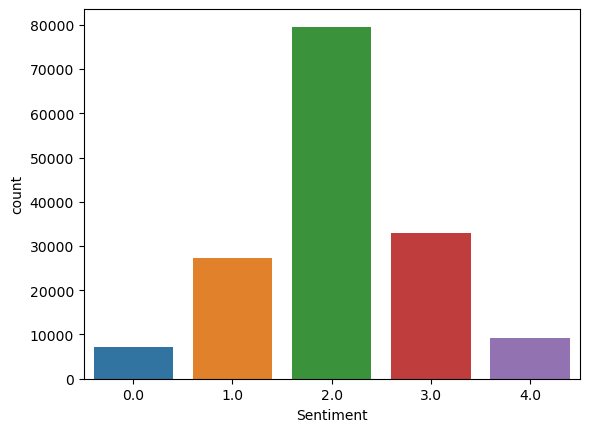

In [55]:
sns.countplot(x='Sentiment', data=df)

In [56]:
# df['Phrase_length'] = df['Phrase'].apply(len)
# fig = plt.figure(figsize=(8, 4))
# sns.boxplot(x='Sentiment', y='Phrase_length', data=df)

#### Training

In [57]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
negations = ['not','isn\'t,','wasn\'t','aren\'t','weren\'t','don\'t','didn\'t','doesn\'t','can\'t','isn\'t']
# remove negations from stop words
stop_words = stop_words - set(negations)

In [58]:
def custom_tokenizer(text):
    # Tokenization
    tokens = text.split()
    
    # Remove stopwords, stem, and lemmatize the words
    processed_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token.lower() not in stop_words
    ]
    token_string = " ".join(processed_tokens)
    
    # Return the processed tokens
    return token_string

In [59]:
df['phrase_custom'] = df['Phrase'].apply(custom_tokenizer)

In [60]:
df.tail(10)

,PhraseId,SentenceId,Phrase,Sentiment,phrase_custom
156068,156069,8556,will never recommend to anyone,1.0,never recommend anyone
156069,156070,8556,I will never recommend this movie to anyone,1.0,never recommend movie anyone
156070,156071,8557,This level of acting never dissapoints the aud...,3.0,level acting never dissapoints audience
156071,156072,8557,level of acting never dissapoints the audience,3.0,level acting never dissapoints audience
156072,156073,8557,acting never dissapoints the audience,3.0,acting never dissapoints audience
156073,156074,8557,never dissapoints the audience,3.0,never dissapoints audience
156074,156075,8558,I don't know why people were so excited It isn...,1.0,don't know people excited isn't worth it.
156075,156076,8558,don't know why people were so excited It wasn'...,1.0,don't know people excited wasn't worth it.
156076,156077,8558,It isn't worth it.,1.0,isn't worth it.
156077,156078,8558,I don't know why people were so excited.,1.0,don't know people excited.


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = df['phrase_custom']
y=df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Training a Mode

**Creating a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of our choice. Then fit that pipeline on the training data.**

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [64]:

# import nltk
# nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [65]:
linear_svc = LinearSVC()
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',linear_svc)])


In [66]:
C = [0.58,0.6,0.62,0.66,0.70]
print(C)
param_grid = {'svc__C':C}

[0.58, 0.6, 0.62, 0.66, 0.7]


In [67]:
grid_model = GridSearchCV(pipe,param_grid=param_grid,n_jobs=-1,scoring='accuracy',cv=10)

In [68]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svc', LinearSVC())]),
             n_jobs=-1, param_grid={'svc__C': [0.58, 0.6, 0.62, 0.66, 0.7]},
             scoring='accuracy')

In [69]:
print(grid_model.best_params_)
best_c = grid_model.best_params_['svc__C']

{'svc__C': 0.7}


**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [70]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [71]:
preds = grid_model.predict(X_test)
preds

array([3., 2., 1., ..., 2., 2., 2.])

In [72]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.54      0.29      0.38      1493
         1.0       0.54      0.43      0.48      5448
         2.0       0.70      0.84      0.76     15882
         3.0       0.56      0.49      0.52      6574
         4.0       0.58      0.32      0.41      1818

    accuracy                           0.64     31215
   macro avg       0.58      0.48      0.51     31215
weighted avg       0.62      0.64      0.62     31215



c:\Users\mrizv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


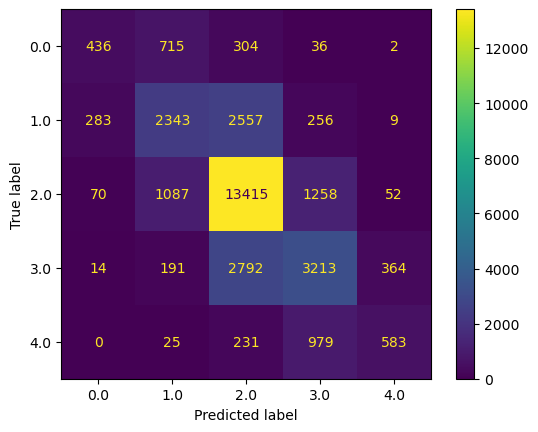

In [73]:
plot_confusion_matrix(grid_model,X_test,y_test)

In [76]:
# grid_model.predict(['Perfect movie ever, I love it and enjoyed a lot, I will recommend to everyone'])
X_test_custom=["I will not recommend this movie to anyone","excellent movie","nice","I don't know why people were so excited, It isn't worth it.","Time waste","Time pass","Time well spent",'Perfect movie ever, I love it and enjoyed a lot, I will recommend to everyone','such story never dissapoints me']
df = pd.DataFrame(X_test_custom,columns=['phrase'])
df['phrase_modified'] = df['phrase'].apply(custom_tokenizer)
df
grid_model.predict(df['phrase_modified'].values)

array([1., 4., 3., 1., 0., 2., 3., 4., 3.])

In [75]:
grid_model.fit(X,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svc', LinearSVC())]),
             n_jobs=-1, param_grid={'svc__C': [0.58, 0.6, 0.62, 0.66, 0.7]},
             scoring='accuracy')

## The End

In [77]:
import joblib
joblib.dump(grid_model,'grid.pkl')

['grid.pkl']